Download the dataset

In [91]:
!wget http://www.cse.iitd.ac.in/~cs5140281/combinedSingleVillageFile.csv
!wget http://www.cse.iitd.ac.in/~cs5140281/Vill.csv
censusLabels=pd.read_csv("Vill.csv")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('combinedSingleVillageFile.csv')
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.columns

--2018-05-10 19:34:19--  http://www.cse.iitd.ac.in/~cs5140281/combinedSingleVillageFile.csv
Resolving www.cse.iitd.ac.in (www.cse.iitd.ac.in)... 103.27.9.152
Connecting to www.cse.iitd.ac.in (www.cse.iitd.ac.in)|103.27.9.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37978563 (36M) [text/csv]
Saving to: ‘combinedSingleVillageFile.csv.2’

combinedSingleVilla 100%[===================>]  36.22M  4.56MB/s    in 19s     

2018-05-10 19:34:39 (1.88 MB/s) - ‘combinedSingleVillageFile.csv.2’ saved [37978563/37978563]

--2018-05-10 19:34:40--  http://www.cse.iitd.ac.in/~cs5140281/Vill.csv
Resolving www.cse.iitd.ac.in (www.cse.iitd.ac.in)... 103.27.9.152
Connecting to www.cse.iitd.ac.in (www.cse.iitd.ac.in)|103.27.9.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290123394 (277M) [text/csv]
Saving to: ‘Vill.csv.2’

Vill.csv.2           14%[=>                  ]  41.12M  4.79MB/s    eta 2m 2s  

Vill.csv.2          100%[===================>] 276.68M  5.75MB/s    in 1m 49s  

2018-05-10 19:36:29 (2.55 MB/s) - ‘Vill.csv.2’ saved [290123394/290123394]



Index([u'tifImage', u'village_2001', u'village_id', u'village_2011', u'rowH',
       u'colH', u'B0', u'B1', u'B2', u'B3', u'B4', u'B5', u'B6', u'B7', u'B8',
       u'B9', u'B10', u'B11', u'B12', u'B13', u'B14', u'B15', u'B16', u'B17',
       u'B18', u'B19', u'B20', u'B21', u'B22', u'B23', u'B24', u'B25', u'B26',
       u'B27', u'B28', u'B29', u'B30', u'B31', u'B32', u'B33', u'B34', u'B35',
       u'B36', u'B37', u'B38', u'B39', u'B40', u'B41', u'B42', u'B43', u'B44',
       u'B45', u'B46', u'B47', u'B48', u'B49', u'B50', u'B51', u'B52', u'B53',
       u'B54', u'B55', u'B56', u'B57', u'B58', u'B59', u'B60', u'B61', u'B62',
       u'B63', u'B64'],
      dtype='object')

In [0]:
# Confusion matrix code
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


Try to cluster using the 64 dimensional night light vector but the cluster is highly skewed for 3 clusters, in 1st clustering 0 NL pixels are also in the cluster, but in the 2nd Clustering NL pixels with DN>0 are considered which makes the clusters a bit less skewed

In [3]:
########### Taking a 64 length vector from DN0 to DN63
listNL=["B"+str(x) for x in range(1,65)]
nlValues = df[listNL]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(nlValues)
labels = kmeans.predict(nlValues)
centroids = kmeans.cluster_centers_
from collections import Counter
temp=Counter(labels)
print(temp)

Counter({0: 172745, 1: 5996, 2: 19})


In [4]:
########### Taking a 63 length vector from DN1 to DN63
listNL=["B"+str(x) for x in range(2,65)]
nlValues = df[listNL]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(nlValues)
labels = kmeans.predict(nlValues)
centroids = kmeans.cluster_centers_
from collections import Counter
temp=Counter(labels)
print(temp)

Counter({0: 158837, 2: 11316, 1: 8607})


In [5]:
########### Taking a 64 length vector from DN0 to DN63 and normalizing it
listNL=["B"+str(x) for x in range(1,65)]
nlValues = df[listNL]
nlValues["sum"] = nlValues.sum(axis=1)
nlValues["sum"]+=1;
nlValues_new = nlValues.loc[:,"B1":"B64"].div(nlValues["sum"], axis=0)
# nlValues_new.drop('sum', axis = 1, inplace = True)
print(nlValues_new)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(nlValues_new)
labels = kmeans.predict(nlValues_new)
centroids = kmeans.cluster_centers_
print("centroids")
print(centroids)
print("centroids")
from collections import Counter
temp=Counter(labels)
print(temp)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


              B1   B2   B3   B4        B5        B6        B7        B8  \
0       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.280435   
1       0.998285  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
2       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.302250  0.697424   
3       0.999772  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
4       0.997222  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
5       0.605938  0.0  0.0  0.0  0.000000  0.393773  0.000000  0.000000   
6       0.998675  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
7       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.874567  0.111804   
8       0.999611  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
9       0.999850  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
10      0.686772  0.0  0.0  0.0  0.000000  0.291295  0.021247  0.000000   
11      0.001082  0.0  0.0  0.0  0.000000  0.000000  0.997835  0.000000   
12      0.999670  0.0  0.

1
2
3
4
5
6
7
8
9


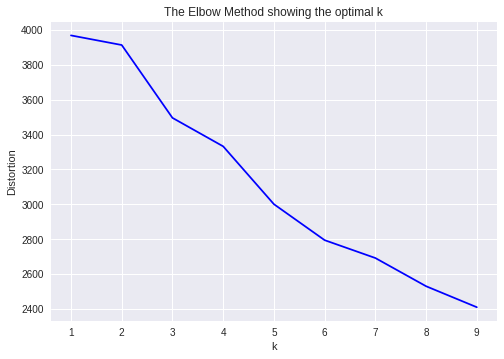

In [6]:
# clustering dataset non-Normalized DN0 to DN63
# determine k using elbow method
listNL=["B"+str(x) for x in range(1,65)]
nlValues = df[listNL]

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
# X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
X=nlValues.values
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


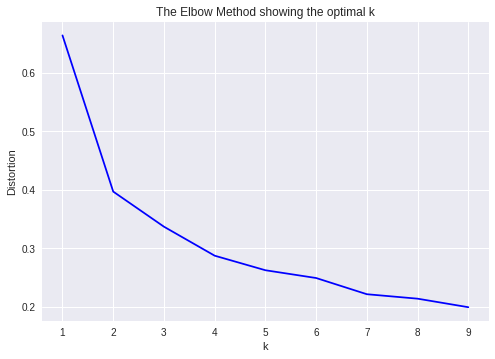

In [7]:
# clustering dataset Normalized DN0 to DN63
# determine k using elbow method
listNL=["B"+str(x) for x in range(1,65)]
nlValues = df[listNL]
nlValues["sum"] = nlValues.sum(axis=1)
nlValues["sum"]+=1;
nlValues_new = nlValues.loc[:,"B1":"B64"].div(nlValues["sum"], axis=0)

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
# X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
X=nlValues_new.values
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


              B1   B2   B3   B4        B5        B6        B7        B8  \
0       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.280435   
1       0.998285  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
2       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.302250  0.697424   
3       0.999772  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
4       0.997222  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
5       0.605938  0.0  0.0  0.0  0.000000  0.393773  0.000000  0.000000   
6       0.998675  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
7       0.000000  0.0  0.0  0.0  0.000000  0.000000  0.874567  0.111804   
8       0.999611  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
9       0.999850  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
10      0.686772  0.0  0.0  0.0  0.000000  0.291295  0.021247  0.000000   
11      0.001082  0.0  0.0  0.0  0.000000  0.000000  0.997835  0.000000   
12      0.999670  0.0  0.

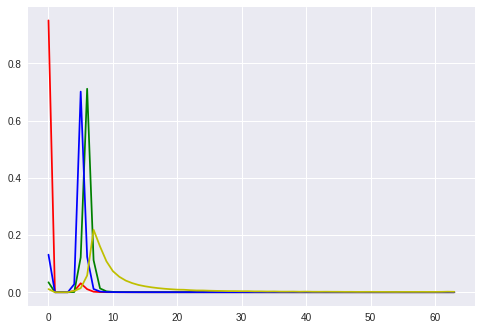

centroids
Counter({0: 73590, 3: 50660, 2: 27949, 1: 26561})


In [93]:
########### Taking a 63 length vector from DN1 to DN63 and normalizing it
listNL=["B"+str(x) for x in range(1,65)]
nlValues = df[listNL]
nlValues["sum"] = nlValues.sum(axis=1)
nlValues["sum"]+=1;
nlValues_new = nlValues.loc[:,"B1":"B64"].div(nlValues["sum"], axis=0)
# nlValues_new.drop('sum', axis = 1, inplace = True)
print(nlValues_new)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(nlValues_new)
labelsUnordered = kmeans.predict(nlValues_new)
centroids = kmeans.cluster_centers_
print("centroids")
print(centroids)
t = [x for x in range(64)]
plt.plot(t, centroids[0], 'r')
plt.plot(t, centroids[1], 'g')
plt.plot(t, centroids[2], 'b')
plt.plot(t, centroids[3], 'y')
plt.show()
print("centroids")
from collections import Counter
temp=Counter(labelsUnordered)
print(temp)

In [94]:
# using rgby
dic = {0:0,1:2,2:1, 3:3}

labels=[dic.get(n) for n in labelsUnordered]

original_df= df.copy()
print original_df.shape

original_df["nlLabels"] = labels

print original_df.columns

original_df = original_df.rename(columns={'village_2011': 'Town/Village'})

print original_df.shape

print len(labels)

print df.shape

print Counter(labels)

print censusLabels.shape

mergeDataFrame=pd.merge(original_df, censusLabels, on='Town/Village')

print mergeDataFrame.shape

print mergeDataFrame.columns



mergeDataFrame.head()
# print censusLabels.head()




(178760, 71)
Index([u'tifImage', u'village_2001', u'village_id', u'village_2011', u'rowH',
       u'colH', u'B0', u'B1', u'B2', u'B3', u'B4', u'B5', u'B6', u'B7', u'B8',
       u'B9', u'B10', u'B11', u'B12', u'B13', u'B14', u'B15', u'B16', u'B17',
       u'B18', u'B19', u'B20', u'B21', u'B22', u'B23', u'B24', u'B25', u'B26',
       u'B27', u'B28', u'B29', u'B30', u'B31', u'B32', u'B33', u'B34', u'B35',
       u'B36', u'B37', u'B38', u'B39', u'B40', u'B41', u'B42', u'B43', u'B44',
       u'B45', u'B46', u'B47', u'B48', u'B49', u'B50', u'B51', u'B52', u'B53',
       u'B54', u'B55', u'B56', u'B57', u'B58', u'B59', u'B60', u'B61', u'B62',
       u'B63', u'B64', u'nlLabels'],
      dtype='object')
(178760, 72)
178760
(178760, 71)
Counter({0: 73590, 3: 50660, 1: 27949, 2: 26561})
(690391, 43)
(166788, 114)
Index([u'tifImage', u'village_2001', u'village_id', u'Town/Village', u'rowH',
       u'colH', u'B0', u'B1', u'B2', u'B3',
       ...
       u'Village_HHD_Cluster_MSW', u'District_HHD_Clust

,tifImage,village_2001,village_id,Town/Village,rowH,colH,B0,B1,B2,B3,...,Village_HHD_Cluster_MSW,District_HHD_Cluster_MSW,Village_HHD_Cluster_CHH,District_HHD_Cluster_CHH,Village_HHD_Cluster_FC,District_HHD_Cluster_FC,Village_HHD_Cluster_BF,District_HHD_Cluster_BF,Village_HHD_Cluster_EMP,District_HHD_Cluster_EMP
0,bihar-0000000000-0000000000,1960500.0,BR-19290,235545,73,118,5548,0,0,0,...,2. Moderately-Developed,2. Moderately-Developed,4. Developed,3. Developed,1. Under-Developed,2. Moderately-Developed,1. Under-Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement
1,bihar-0000000000-0000000000,8100.0,BR-153,216069,85,86,2920,4390,0,0,...,2. Moderately-Developed,2. Moderately-Developed,3. Developed-,3. Developed,1. Under-Developed,2. Moderately-Developed,1. Under-Developed,1. Under-Developed,2. High AL,1. High Unemployement
2,bihar-0000000000-0000009216,1151100.0,BR-11853,227454,19,28,173,359,0,0,...,2. Moderately-Developed,2. Moderately-Developed,1. Under-Developed,3. Developed,2. Moderately-Developed,2. Moderately-Developed,1. Under-Developed,1. Under-Developed,2. High AL,1. High Unemployement
3,bihar-0000000000-0000000000,3250900.0,BR-24116,248357,76,105,4512,2102,0,0,...,2. Moderately-Developed,2. Moderately-Developed,2. Under-Developed+,3. Developed,2. Moderately-Developed,2. Moderately-Developed,1. Under-Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement
4,bihar-0000000000-0000000000,1944200.0,BR-18134,235382,55,34,1116,754,0,0,...,2. Moderately-Developed,2. Moderately-Developed,4. Developed,3. Developed,2. Moderately-Developed,2. Moderately-Developed,3. Developed,1. Under-Developed,1. High Unemployement,1. High Unemployement


msw Counter({'2. Moderately-Developed': 87468, '3. Developed': 44420, '1. Under-Developed': 34900})
msl Counter({'3. Developed': 69663, '1. Under-Developed': 60808, '2. Moderately-Developed': 36317})
emp Counter({'1. High Unemployement': 75960, '2. High AL': 74926, '3. High Non-AL': 15902})
bf Counter({'1. Under-Developed': 135201, '3. Developed': 17479, '2. Moderately-Developed': 14108})
fc Counter({'1. Under-Developed': 114623, '2. Moderately-Developed': 42871, '3. Developed': 9294})
chh Counter({'2. Under-Developed+': 56796, '3. Developed-': 55686, '1. Under-Developed': 41620, '4. Developed': 12686})
Counter({0: 66796, 3: 48591, 1: 26354, 2: 25047})
Normalized confusion matrix
[[0.49117479 0.16363897 0.10467049 0.24051576]
 [0.49017927 0.13125943 0.14938034 0.22918096]
 [0.15261144 0.20625844 0.18748312 0.45364701]
 [       nan        nan        nan        nan]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


Normalized confusion matrix
[[0.71442902 0.08535061 0.09546441 0.10475595]
 [0.32819341 0.21039733 0.17121458 0.29019467]
 [0.16413304 0.19412026 0.18695721 0.45478949]
 [       nan        nan        nan        nan]]
Normalized confusion matrix
[[0.44877567 0.13279358 0.14963138 0.26879937]
 [0.39441582 0.19762165 0.16546993 0.24249259]
 [0.19840272 0.09181235 0.08068168 0.62910326]
 [       nan        nan        nan        nan]]


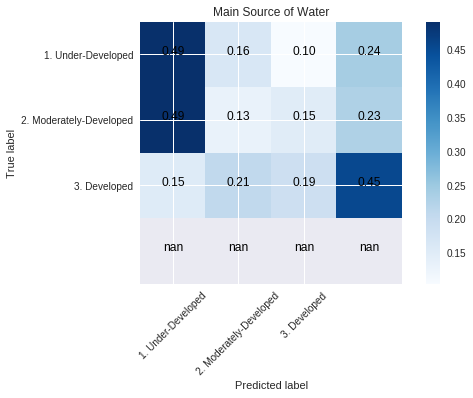

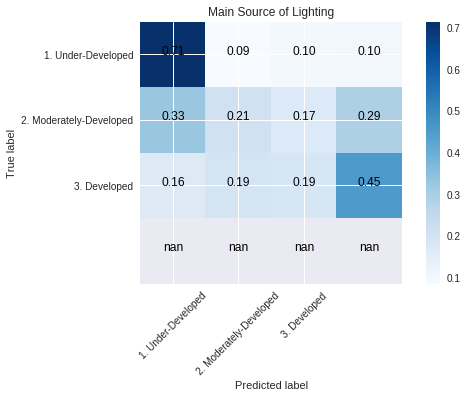

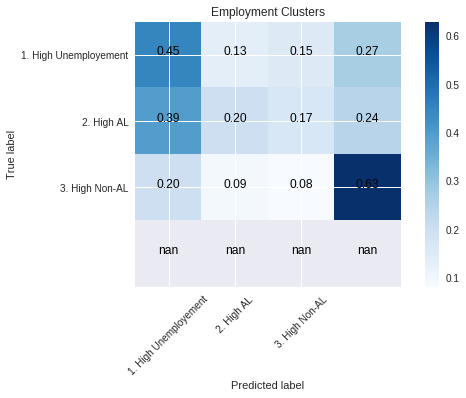

In [95]:
msw=mergeDataFrame["Village_HHD_Cluster_MSW"].tolist()
mswDict={'1. Under-Developed':0,'2. Moderately-Developed':1,'3. Developed':2}
mswList = [ mswDict.get(item) for item in msw ]


msl=mergeDataFrame["Village_HHD_Cluster_MSL"].tolist()
mslDict={'1. Under-Developed':0,'2. Moderately-Developed':1,'3. Developed':2}
mslList = [ mslDict.get(item) for item in msl ]

emp=mergeDataFrame["Village_HHD_Cluster_EMP"].tolist()
empDict={'1. High Unemployement':0,'2. High AL':1,'3. High Non-AL':2}
empList = [ empDict.get(item) for item in emp ]


bf=mergeDataFrame["Village_HHD_Cluster_BF"].tolist()
fc=mergeDataFrame["Village_HHD_Cluster_FC"].tolist()
chh=mergeDataFrame["Village_HHD_Cluster_CHH"].tolist()
nightPredictions=mergeDataFrame["nlLabels"].tolist()
print "msw",Counter(msw)
print "msl",Counter(msl)
print "emp",Counter(emp)
print "bf",Counter(bf)
print "fc",Counter(fc)
print "chh",Counter(chh)
print Counter(nightPredictions)

#plot MSL Labels 
cnf_matrix = confusion_matrix(mswList, nightPredictions)
class_names=['1. Under-Developed','2. Moderately-Developed','3. Developed']
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Main Source of Water')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Main Source of Water')


#plot MSL Labels 
cnf_matrix = confusion_matrix(mslList, nightPredictions)
class_names=['1. Under-Developed','2. Moderately-Developed','3. Developed']
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Main Source of Lighting')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Main Source of Lighting')


#plot Emp Labels 
cnf_matrix = confusion_matrix(empList, nightPredictions)
class_names=['1. High Unemployement','2. High AL','3. High Non-AL']
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Employment Clusters')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Employment Clusters')




In [88]:
##########Using Random Forest to classify Emp Labels
listNL=["B"+str(x) for x in range(1,65)]
nlValues = mergeDataFrame[listNL]
nlValues["sum"] = nlValues.sum(axis=1)
nlValues["sum"]+=1;
nlValues_new = nlValues.loc[:,"B2":"B64"].div(nlValues["sum"], axis=0)
trainDataRandomForest = nlValues_new.as_matrix()

nlValues = mergeDataFrame["nlLabels"]

emp=mergeDataFrame["Village_HHD_Cluster_EMP"].tolist()
empDict={'1. High Unemployement':0,'2. High AL':1,'3. High Non-AL':2}
empList = [ empDict.get(item) for item in emp ]

labelArray=np.asarray(empList)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainDataRandomForest, labelArray, test_size=0.2, random_state=42)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
print len(empList)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(133430, 63)
(33358, 63)
(133430,)
(33358,)
166788


In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
results = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test, results))

('Accuracy', 0.5043168055638827)


('Accuracy', 0.5043168055638827)
Confusion matrix, without normalization
[[9934 4679  636]
 [8495 6057  469]
 [1407  849  832]]
Normalized confusion matrix
[[0.65145255 0.30683979 0.04170765]
 [0.56554158 0.40323547 0.03122295]
 [0.45563472 0.27493523 0.26943005]]


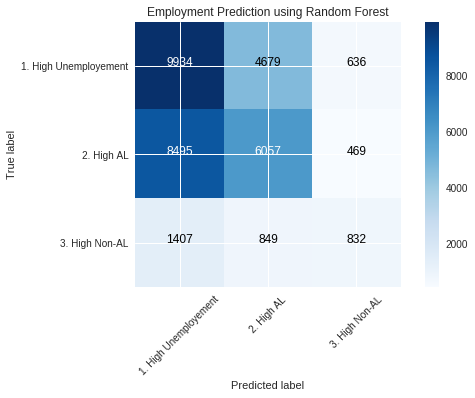

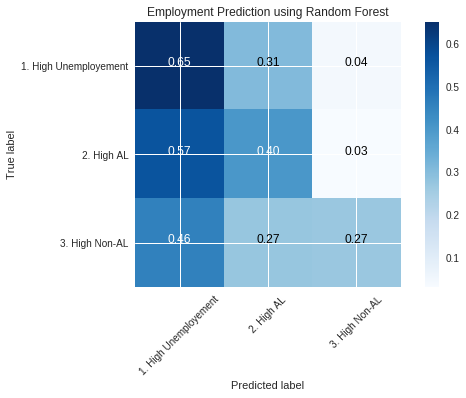

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test, results))
cnf_matrix = confusion_matrix(y_test, results)
class_names=['1. High Unemployement','2. High AL','3. High Non-AL']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Employment Prediction using Random Forest')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Employment Prediction using Random Forest')

In [9]:
########### Taking a 63 length vector from DN1 to DN63 and normalizing it
listNL=["B"+str(x) for x in range(2,65)]
nlValues = df[listNL]
nlValues["sum"] = nlValues.sum(axis=1)
nlValues["sum"]+=1;
nlValues_new = nlValues.loc[:,"B2":"B64"].div(nlValues["sum"], axis=0)
# nlValues_new.drop('sum', axis = 1, inplace = True)
print(nlValues_new)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(nlValues_new)
labels = kmeans.predict(nlValues_new)
centroids = kmeans.cluster_centers_
print("centroids")
print(centroids)
print("centroids")
from collections import Counter
temp=Counter(labels)
print(temp)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


         B2   B3   B4        B5        B6        B7        B8        B9  \
0       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.280435  0.019565   
1       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2       0.0  0.0  0.0  0.000000  0.000000  0.302250  0.697424  0.000000   
3       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
5       0.0  0.0  0.0  0.000000  0.999268  0.000000  0.000000  0.000000   
6       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
7       0.0  0.0  0.0  0.000000  0.000000  0.874567  0.111804  0.013398   
8       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9       0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
10      0.0  0.0  0.0  0.000000  0.929978  0.067834  0.000000  0.000000   
11      0.0  0.0  0.0  0.000000  0.000000  0.998917  0.000000  0.000000   
12      0.0  0.0  0.0  0.

<type 'numpy.ndarray'>
609062039.0
[ 0.          0.          0.          1.96947572 27.28482377 24.51016685
 13.6201951   8.05815777  5.1623682   3.58504464  2.70170327  2.07217577
  1.62080829  1.23685528  1.00302475  0.80818631  0.66822881  0.55297355
  0.48153929  0.40851602  0.35277342  0.30934107  0.26190107  0.23400096
  0.21088853  0.19013859  0.17688559  0.15512196  0.15251566  0.126351
  0.13169282  0.10453073  0.10556215  0.09403558  0.10148917  0.08373909
  0.07892267  0.08254446  0.06863931  0.07386965  0.06289885  0.05935307
  0.06323444  0.05609511  0.05843723  0.05230337  0.05017157  0.04592422
  0.04775638  0.0487768   0.04540999  0.04232508  0.0449327   0.0346078
  0.03999363  0.04118644  0.04040869  0.04458249  0.03794211  0.04851033
  0.0463557   0.06765748  0.08194962]
[  0.           0.           0.           1.96947572  29.2542995
  53.76446635  67.38466145  75.44281922  80.60518741  84.19023206
  86.89193532  88.96411109  90.58491938  91.82177466  92.82479941
  9

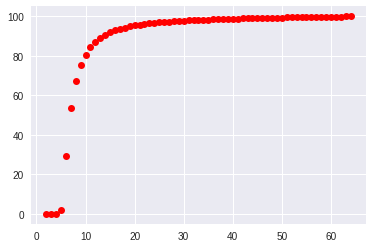

In [0]:
listNL=["B"+str(x) for x in range(2,65)]
nlValues = df[listNL]
sumNL=nlValues.sum().values.astype(float)
totalPixels=sumNL.sum()
# print(sumNL)
print(type(sumNL))
print(sumNL.sum())
percentageNL=sumNL*(100.0/totalPixels)
print(percentageNL)
cumPercentSum=np.cumsum(percentageNL, dtype=float)
print(cumPercentSum)
xList = [t for t in range(2,65)]
import matplotlib.pyplot as plt
plt.plot(xList,cumPercentSum, 'ro')
# plt.axis([0, 6, 0, 20])
plt.show()

Below is the Chart for Plot of Height and Width of All Villages!

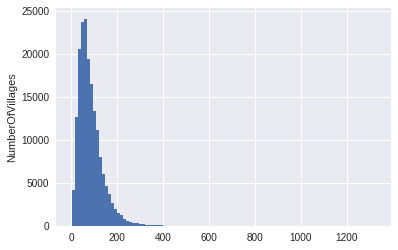

In [0]:
dfrowH=df[['rowH']].values
rowHValues= [x[0] for x in dfrowH]
%matplotlib inline
plt.hist(rowHValues, normed=False, bins=100)
plt.ylabel('NumberOfVillages');

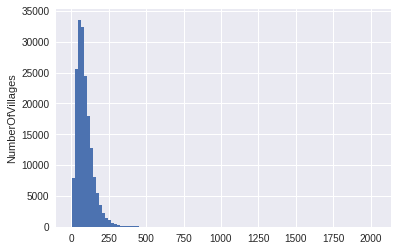

In [0]:
dfcolH=df[['colH']].values
colHValues= [x[0] for x in dfcolH]
%matplotlib inline
plt.hist(colHValues, normed=False, bins=100)
plt.ylabel('NumberOfVillages');

In [3]:
threshold=250
dfDimension = df[['rowH','colH']]
# dfDimension.head()
print(dfDimension.shape[0])
print(dfDimension.shape[0])
x=[]
y=[]
for threshold in range(300):
  dfDimension1 = dfDimension[ (dfDimension.rowH<=threshold) & (dfDimension.colH<=threshold) ]
  x.append(threshold)
  y.append(dfDimension1.shape[0])

178760
178760


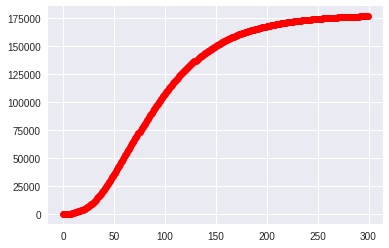

In [0]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
# plt.axis([0, 6, 0, 20])
plt.show()

In [4]:
dfDimension1 = dfDimension[ (dfDimension.rowH<=100) & (dfDimension.colH<=100) ]
print(dfDimension1.shape[0])
dfDimension1 = dfDimension[ (dfDimension.rowH<=150) & (dfDimension.colH<=150) ]
print(dfDimension1.shape[0])
dfDimension1 = dfDimension[ (dfDimension.rowH<=200) & (dfDimension.colH<=200) ]
print(dfDimension1.shape[0])
dfDimension1 = dfDimension[ (dfDimension.rowH<=250) & (dfDimension.colH<=250) ]
print(dfDimension1.shape[0])

107710
150393
168040
174639
